In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Collect Crypto Prices Using the requests Library

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
requests.get(btc_url)

<Response [200]>

In [6]:
btc_request = requests.get(btc_url)

In [7]:
btc_data = btc_request.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

32064.0

In [8]:
# Fetch current ETH price
requests.get(eth_url)

<Response [200]>

In [9]:
eth_request = requests.get(eth_url)

In [10]:
eth_data = eth_request.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

1833.95

In [11]:
# Compute current value of my crpto
my_btc = 1.2
my_eth = 5.3
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38476.80
The current value of your 5.3 ETH is $9719.93


In [13]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [16]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


In [17]:
# Format current date as ISO format
today = pd.Timestamp.today().strftime("%Y-%m-%d")
today

'2021-06-25'

In [18]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                         \
                             open     high       low    close     volume   
2017-07-06 00:00:00-04:00  108.95  109.000  108.8200  108.950  2057393.0   
2017-07-07 00:00:00-04:00  108.89  108.950  108.8300  108.870  2536724.0   
2017-07-10 00:00:00-04:00  108.97  109.020  108.8900  108.960  1940466.0   
2017-07-11 00:00:00-04:00  108.97  109.100  108.9300  109.055  1613602.0   
2017-07-12 00:00:00-04:00  109.38  109.430  109.2600  109.380  1787218.0   
...                           ...      ...       ...      ...        ...   
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.960  4934966.0   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.110  5299846.0   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.050  5000374.0   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.070  6672880.0   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.890  3987588.0   

                              SPY                                        
                             open      high     low   close      volume  
2017-07-06 00:00:00-04:00     NaN       NaN     NaN     NaN         NaN  
2017-07-07 00:00:00-04:00  241.21  242.2800  241.02  242.10  36831437.0  
2017-07-10 00:00:00-04:00  241.95  242.8000  241.76  242.36  27912725.0  
2017-07-11 00:00:00-04:00  242.16  242.5500  240.85  242.16  40900622.0  
2017-07-12 00:00:00-04:00  243.30  244.2000  243.30  243.98  38779965.0  
...                           ...       ...     ...     ...         ...  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  
2021-06-23 00:00:00-04:00  423.19  424.0500  422.51  422.60  41476351.0  
2021-06-24 00:00:00-04:00  424.89  425.5500  424.62  425.09  39863529.0  
2021-06-25 00:00:00-04:00  425.90  427.0943  425.55  426.57  50460394.0  

[1001 rows x 10 columns]

In [19]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG'].loc[today]['close']
spy_close_price = df_portfolio['SPY'].loc[today]['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [20]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


In [21]:
# Savings Health Analysis
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
rows = {
    'Amounts':[my_spy_value + my_agg_value, my_btc_value + my_eth_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(index=['Shares','Crypto'], data=rows)

# Display savings DataFrame
display(df_savings)

,Amounts
Shares,44306.500
Crypto,48196.735


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000241423308B0>],
      dtype=object)

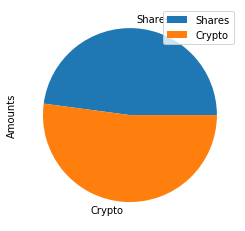

In [22]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_spy_value + my_agg_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
else:
    print("You are" + (total_savings - emergency_fund) + " dollars away from reaching your goal.")

Congratulations for having enough money in this fund!


In [24]:
#Part 2 - Retirement Planning
#Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994654,1.008047,0.997000,1.017330,1.008731,1.006083,1.013900,1.009312,0.996071,1.009931,...,1.006782,1.010516,1.003912,0.987740,1.001234,1.001395,0.995952,0.996183,1.000895,0.999427
2,0.999230,1.000197,1.005843,1.023024,1.000283,1.011930,1.022090,1.008447,0.989423,1.021138,...,1.003901,1.005436,0.990828,0.985567,1.008693,0.996685,1.002741,0.991374,1.000307,0.991710
3,1.012421,1.004384,1.017942,1.018155,1.006711,1.007083,1.028750,1.016579,0.979979,1.020878,...,1.007607,1.006562,1.003166,0.965310,1.028352,0.995621,0.984418,0.980956,1.004857,0.981097
4,1.013087,1.002889,1.008212,1.018217,1.020707,1.024317,1.027901,1.015543,0.982665,1.017600,...,1.011157,1.007443,1.002583,0.955702,1.039748,0.999780,0.978910,0.980954,1.010859,0.971221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.390882,11.775038,34.250513,8.210678,62.082185,8.990848,12.783239,27.092991,18.127353,26.100576,...,3.220452,8.049046,21.793402,21.460671,36.593697,65.274672,40.630692,11.752815,13.878297,18.958674
7557,13.456768,12.081768,34.500287,8.198534,62.263237,8.956978,12.878127,27.412292,18.130566,26.696710,...,3.232083,8.133906,21.803057,21.143459,36.590495,65.707266,40.773144,11.817310,13.907581,19.036120
7558,13.569208,12.084553,34.486612,8.309286,62.612797,9.025910,12.850138,27.443719,18.154870,26.424145,...,3.237213,8.251850,22.083218,21.358773,36.510130,65.229207,41.060926,11.827334,13.946590,18.885294
7559,13.582668,12.028218,34.836956,8.323545,62.563085,9.088295,12.902123,27.429647,18.329888,26.402194,...,3.245212,8.336253,21.697393,21.557723,36.568788,65.613245,40.722902,11.862915,13.870112,19.002519


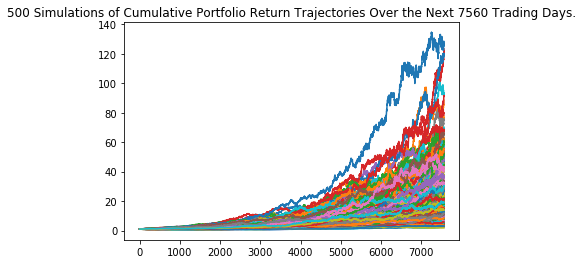

In [36]:
# Plot simulation outcomes
line_plot = MC_stocks.plot_simulation()

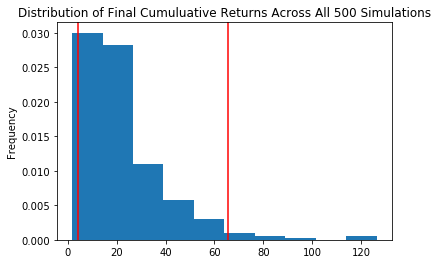

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             22.587501
std              17.225626
min               1.806093
25%              11.313713
50%              17.851770
75%              28.297720
max             126.323303
95% CI Lower      4.183144
95% CI Upper     65.446848
Name: 7560, dtype: float64


In [39]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83662.88 and $1308936.96


In [ ]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals 
#based on a 50% increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*30000,2)
ci_upper = round(summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125494.32 and $1963405.44


In [43]:
#Optional Challenge - Early Retirement¶
#Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998432,0.993502,0.982393,0.998344,0.980481,1.005226,1.004373,1.003642,0.999353,1.009750,...,0.990647,0.997175,0.999891,1.009289,0.996319,0.992751,0.997870,1.005606,1.004874,0.998170
2,1.000495,1.002000,0.987307,0.981422,0.976373,1.007162,1.009129,1.010495,0.989250,1.007671,...,0.997674,1.008069,1.000571,0.996483,1.000896,1.015277,0.993442,1.015801,1.011956,1.009510
3,0.990161,1.003273,0.986055,0.989107,0.979735,1.002214,1.004877,1.015033,0.985886,1.011169,...,0.993557,1.003589,0.997702,0.986367,1.007105,1.011081,1.000163,1.021574,1.011742,1.013920
4,0.981455,1.014510,0.974124,0.991259,0.965447,1.003331,1.013748,1.010234,0.992003,1.015400,...,0.982509,1.007105,0.994351,0.982293,1.000435,1.016594,1.004558,1.019961,1.013312,1.014361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.870672,1.367644,1.212520,1.205753,0.826402,1.670370,1.007656,1.301583,2.436854,1.798233,...,0.962582,1.760874,1.080670,1.484709,2.093498,1.624328,1.890338,1.334443,1.513597,1.838226
1257,1.831382,1.388681,1.204790,1.200455,0.829408,1.656519,1.006850,1.290333,2.440023,1.769384,...,0.963061,1.773767,1.091598,1.495871,2.078172,1.641550,1.878573,1.340686,1.520113,1.822373
1258,1.834099,1.376119,1.207545,1.195319,0.829068,1.654030,1.001831,1.280920,2.450713,1.760827,...,0.959970,1.768542,1.099218,1.497645,2.086485,1.629599,1.858106,1.323086,1.525948,1.855167
1259,1.863890,1.386755,1.197965,1.206597,0.831570,1.655549,1.013261,1.268089,2.479758,1.762590,...,0.957866,1.766333,1.107174,1.484513,2.059056,1.636108,1.875430,1.325179,1.546374,1.855184


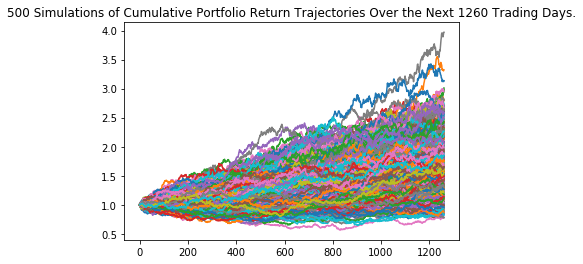

In [46]:
# Plot simulation outcomes
line_plot5 = MC_stocks5.plot_simulation()

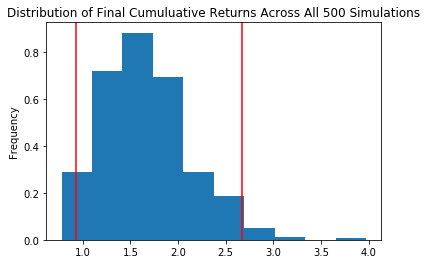

In [47]:
# Plot probability distribution and confidence intervals
dist_plot5 = MC_stocks5.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
summary5 = MC_stocks5.summarize_cumulative_return()

# Print summary statistics
print(summary5)

count           500.000000
mean              1.668845
std               0.462251
min               0.778535
25%               1.348369
50%               1.616685
75%               1.935751
max               3.970290
95% CI Lower      0.930306
95% CI Upper      2.672848
Name: 1260, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary5[8]*30000,2)
ci_upper_five = round(summary5[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $27909.18 and $80185.43


In [50]:
#Ten Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [52]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993948,1.009728,1.000897,1.000379,0.998482,0.991693,1.001596,1.006397,1.005480,1.004744,...,1.002112,1.003400,0.985855,0.993429,0.997865,0.999946,0.979854,0.988007,0.994467,1.001919
2,0.994950,1.003363,1.006873,0.990665,0.997928,0.987712,1.006210,1.013623,1.021551,1.017104,...,1.005161,1.013376,0.982303,1.005232,0.995377,1.006899,0.980427,0.988170,1.006659,0.994075
3,1.000111,0.995387,1.006275,0.985770,1.003019,0.984908,1.003068,1.006852,1.023262,1.020433,...,0.999726,1.021284,0.990592,0.995806,0.986270,1.016170,0.985699,0.988602,1.002858,0.990626
4,1.016104,0.998931,1.011087,0.973855,1.003887,0.981010,0.997450,1.013955,1.015724,1.016339,...,0.997297,1.035192,0.996620,0.994379,0.994528,1.023435,0.979720,0.994121,1.000792,0.989002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.482941,3.343575,2.339542,5.083715,3.536621,1.670143,5.272312,2.328441,1.884446,3.998637,...,4.039111,3.518913,2.291208,5.300484,4.177858,2.246105,1.931206,2.836917,1.742053,2.512574
2517,2.465455,3.355432,2.345166,5.161717,3.578552,1.664746,5.251611,2.358166,1.863349,4.017091,...,4.033951,3.567467,2.301733,5.332167,4.112417,2.249143,1.918226,2.836606,1.765570,2.529352
2518,2.457406,3.401668,2.365034,5.120090,3.566691,1.652639,5.238607,2.358550,1.880953,3.986293,...,4.001447,3.541276,2.296458,5.377459,4.096615,2.258967,1.909149,2.821742,1.747913,2.526796
2519,2.441908,3.425871,2.377512,5.087480,3.591728,1.658663,5.209757,2.361540,1.863765,4.006581,...,3.977265,3.515038,2.291164,5.397967,4.117520,2.247945,1.916798,2.836555,1.727188,2.513458


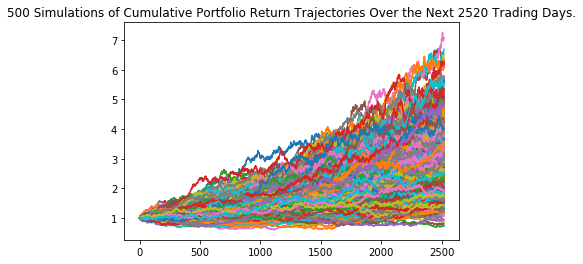

In [53]:
# Plot simulation outcomes
line_plot10 = MC_stocks10.plot_simulation()

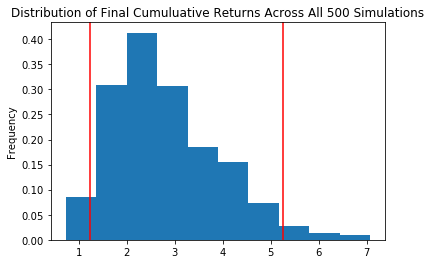

In [54]:
# Plot probability distribution and confidence intervals
dist_plot10 = MC_stocks10.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
summary10 = MC_stocks10.summarize_cumulative_return()

# Print summary statistics
print(summary10)

count           500.000000
mean              2.801591
std               1.105189
min               0.726976
25%               1.997219
50%               2.593319
75%               3.390998
max               7.071365
95% CI Lower      1.234889
95% CI Upper      5.252643
Name: 2520, dtype: float64


In [56]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary10[8]*30000,2)
ci_upper_ten = round(summary10[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $37046.66 and $157579.3
